In [57]:
from bertopic import BERTopic
from sklearn.datasets import fetch_20newsgroups
from sentence_transformers import SentenceTransformer
import umap
import hdbscan
import matplotlib.pyplot as plt
import pandas as pd
import json
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

In [58]:
model = SentenceTransformer('allenai-specter')

In [460]:
with open('../articles_data/all_articles_with_thumbnail_metadata.json') as f:
    papers = json.load(f)

# docs = [paper['article_title'] + ' ' + paper['abstract'] for paper in papers]
# doc_titles = [paper['article_title'] for paper in papers]
# doc_years = [paper['published_year'] for paper in papers]
#
#
# embeddings = model.encode(docs, show_progress_bar=True)


In [461]:
f = open(f'../embeddings/high_dimension/allenai_specter_high_dim.json')
data = json.load(f)
doc_titles = list(data.keys())
embeddings = list(data.values())
docs =[paper['article_title'] + '. ' + paper['abstract'] for paper in papers]
doc_years = [paper['published_year'] for paper in papers]

In [532]:
from sklearn.cluster import AgglomerativeClustering
import json


def docvec():
    # docs = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))['data']
    # docs = docs[0:100]


    # umap_embeddings = umap.UMAP(n_neighbors=5,
    #                             n_components=5,
    #                             metric='cosine').fit_transform(embeddings)

    # cluster = hdbscan.HDBSCAN(min_cluster_size=3,
    #                           metric='euclidean',
    #                           cluster_selection_method='eom').fit(umap_embeddings)
    corpus_embeddings = embeddings /  np.linalg.norm(embeddings, axis=1, keepdims=True)
    cluster = AgglomerativeClustering(affinity='cosine', linkage='average', distance_threshold=None, n_clusters=22).fit(corpus_embeddings) #, affinity='cosine', linkage='average', distance_threshold=0.4)



    # Prepare data
    umap_data = umap.UMAP(n_neighbors=5, n_components=2, metric='cosine').fit_transform(corpus_embeddings)
    result = pd.DataFrame(umap_data, columns=['x', 'y'])
    result['labels'] = cluster.labels_
    result['titles'] = doc_titles
    result['years'] = doc_years
    print(cluster.labels_.max())


    docs_df = pd.DataFrame(docs, columns=["Doc"])
    docs_df['Topic'] = cluster.labels_
    docs_df['Titles'] = doc_titles
    docs_df['Years'] = doc_years
    docs_df['Doc_ID'] = range(len(docs_df))
    docs_per_topic = docs_df.groupby(['Topic'], as_index=False).agg({'Doc': ' '.join,'Years':set})
    return result,cluster, docs_df, docs_per_topic

In [533]:


result,cluster, docs_df, docs_per_topic = docvec()


21


In [534]:

docs_per_topic

,Topic,Doc,Years
0,0,Pelvis Runner: Visualizing Pelvic Organ Variab...,"{2010, 2016, 2021, 2019, 2008, 2015, 2020, 201..."
1,1,Automatic Segmentation of the Pelvic Bones fro...,"{2010, 2016, 2008, 2015, 2017, 2014, 2012}"
2,2,Interactive Exploded Views for Molecular Struc...,"{2021, 2016, 2019, 2008, 2015, 2020, 2017, 201..."
3,3,Introducing CNN-Based Mouse Grim Scale Analysi...,"{2017, 2018}"
4,4,Real-Time Guidance and Anatomical Information ...,"{2016, 2021, 2015, 2020, 2014, 2018}"
5,5,Visual Exploratory Analysis for Multiple T-Maz...,"{2018, 2014, 2012}"
6,6,Semantic Segmentation of Brain Tumors in MRI D...,"{2010, 2021, 2019, 2020, 2015, 2017, 2014, 201..."
7,7,Haptics-based Modelling of Pigmented Skin Lesi...,"{2008, 2015}"
8,8,Student and Teacher Meet in a Shared Virtual R...,"{2014, 2020}"
9,9,Using Position-Based Dynamics for Simulating t...,"{2019, 2010}"


In [535]:

index = list(docs_per_topic.Years)
years_topic_wise = {i:list(index)
               for i, index in enumerate(index)}
years_topic_wise

{0: ['2010',
  '2016',
  '2021',
  '2019',
  '2008',
  '2015',
  '2020',
  '2017',
  '2014',
  '2018',
  '2012'],
 1: ['2010', '2016', '2008', '2015', '2017', '2014', '2012'],
 2: ['2021',
  '2016',
  '2019',
  '2008',
  '2015',
  '2020',
  '2017',
  '2014',
  '2018',
  '2012'],
 3: ['2017', '2018'],
 4: ['2016', '2021', '2015', '2020', '2014', '2018'],
 5: ['2018', '2014', '2012'],
 6: ['2010', '2021', '2019', '2020', '2015', '2017', '2014', '2018', '2012'],
 7: ['2008', '2015'],
 8: ['2014', '2020'],
 9: ['2019', '2010'],
 10: ['2021', '2019', '2015', '2020', '2017'],
 11: ['2017', '2019'],
 12: ['2016'],
 13: ['2018'],
 14: ['2019', '2008'],
 15: ['2015'],
 16: ['2019', '2020'],
 17: ['2020'],
 18: ['2017', '2020'],
 19: ['2021'],
 20: ['2017'],
 21: ['2010', '2019', '2008', '2015', '2017', '2018', '2012']}

In [536]:
def c_tf_idf(documents, m, ngram_range=(1, 2)):
    count = CountVectorizer(ngram_range=ngram_range, stop_words="english").fit(documents)
    t = count.transform(documents).toarray()
    w = t.sum(axis=1)
    tf = np.divide(t.T, w)
    sum_t = t.sum(axis=0)
    idf = np.log(np.divide(m, sum_t)).reshape(-1, 1)
    tf_idf = np.multiply(tf, idf)

    return tf_idf, count

In [537]:
tf_idf, count = c_tf_idf(docs_per_topic.Doc.values, m=len(docs))

In [538]:
def extract_top_n_words_per_topic(tf_idf, count, docs_per_topic, n):
    words = count.get_feature_names()
    labels = list(docs_per_topic.Topic)
    tf_idf_transposed = tf_idf.T
    indices = tf_idf_transposed.argsort()[:, -n:]
    top_n_words = {label: [words[j] for j in indices[i]][::-1] for i, label in enumerate(labels)}
    return top_n_words

In [539]:
def extract_topic_sizes(df):
    topic_sizes = (df.groupby(['Topic'])
                     .Doc
                     .count()
                     .reset_index()
                     .rename({"Topic": "Topic", "Doc": "Size"}, axis='columns')
                     .sort_values("Size", ascending=False))
    return topic_sizes

{0: ['blood', 'flow', 'vessel', 'ultrasound', 'blood flow', 'volume', 'vascular', 'vessels', 'mri', 'evaluation'], 1: ['pet', 'ct', 'registration', 'implant', 'smoothing', 'lung', 'mesh', 'bone', 'modeling', 'correction'], 2: ['molecular', 'protein', 'proteins', 'tunnels', 'cell', 'molecule', 'molecules', 'tunnel', 'properties', 'biological'], 3: ['mgs', 'automated', 'distress', 'semi automated', 'fcn', 'mgs scoring', 'neural networks', 'scoring', 'mouse', 'animals'], 4: ['ar', 'reality', 'display', 'hmd', 'gesture', 'biopsy', 'device', 'craniotomy', 'augmented reality', 'touch'], 5: ['neurons', 'overlaps', 'synapses', 'maze', 'fruit fly', 'multiple maze', 'neuron', 'fruit', 'dendrograms', 'neural'], 6: ['diffusion', 'fiber', 'tensor', 'tractography', 'crossing', 'uncertainty', 'brain', 'tracts', 'diffusion tensor', 'matter'], 7: ['haptic', 'haptic rendering', 'haptics', 'skin', 'skin lesions', 'lesions', 'modelling', 'pigmented', 'spheres', 'pigmented skin'], 8: ['student', 'hand', 't

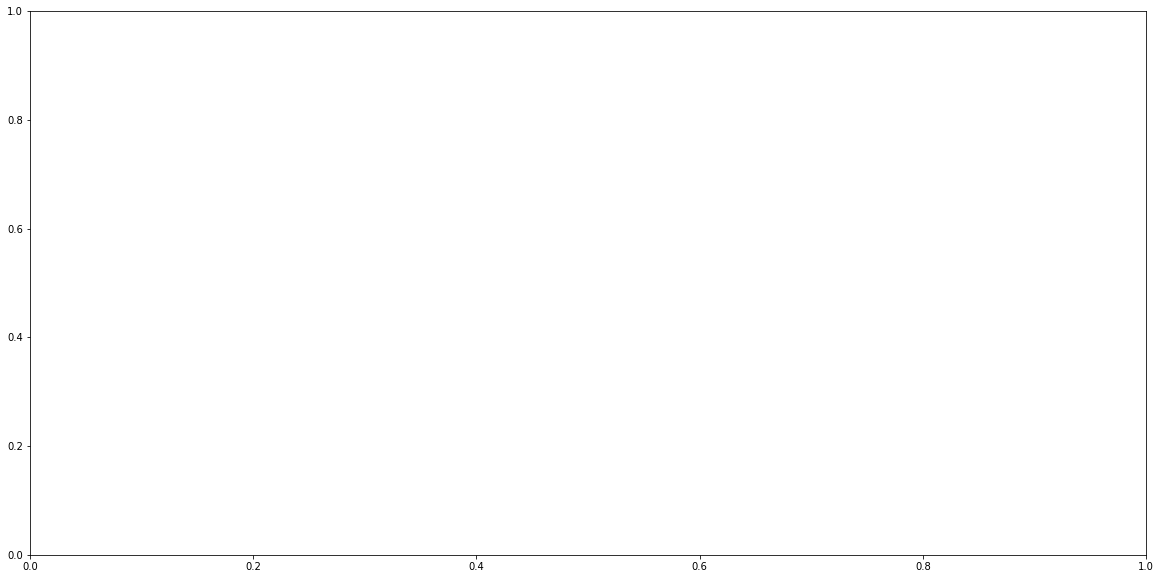

In [540]:
top_n_words = extract_top_n_words_per_topic(tf_idf, count, docs_per_topic, n=10)
print(top_n_words)

from collections import Counter
import plotly.graph_objects as go
import plotly.io as pio


# Visualize clusters
fig, ax = plt.subplots(figsize=(20, 10))
outliers = result.loc[result.labels == -1, :]
clustered = result.loc[result.labels != -1, :]

# outlier_years = list(years_topic_wise[-1])
clustered_years = [value for key, value in years_topic_wise.items() if key!=1]


plot_top=Counter() # to get only distinct labels, replace with a set and add a check here [1]
top_terms = top_n_words

for key, a in top_terms.items():
  k = []
  for i in a:
    for j in a:
        if  i!=j and i in j:
            k.append(i)

  top_terms[key] = list(filter(lambda i: i not in k, a))

for  b in clustered_years:
        k=b
        k=b.sort()


topic_years = ['.'.join(str(e) for e in years_topic_wise[item]) for item in clustered.labels]
topic_years_outliers = ['.'.join(str(e) for e in years_topic_wise[item]) for item in outliers.labels]



top_terms_docs = ['.'.join(str(e) for e in top_terms[item]) for item in clustered.labels]
top_terms_docs_outliers = ['.'.join(str(e) for e in top_terms[item]) for item in outliers.labels]

df1 = pd.DataFrame({'a':top_terms_docs_outliers,'b':topic_years_outliers})

df2 = pd.DataFrame({'a':top_terms_docs, 'b':topic_years})


pio.renderers.default = "browser"
import plotly.express as px
df = px.data.iris()
fig = px.scatter(x=clustered.x, y=clustered.y, color=top_terms_docs, hover_name=clustered.titles,
                 labels={"color" : "Topics"}, hover_data=[df2['b']])

# fig.add_trace(go.Scatter(customdata=df2, mode='markers', hovertext=clustered.titles,
#                                     hovertemplate='<b>%{hovertext}<br></b><br><br>years = %{customdata[1]}<br>Topic= %{customdata[0]}</br>'
#                                      ))
fig.add_trace(go.Scatter(x=outliers.x, y=outliers.y,customdata=df1, mode='markers', showlegend=True, hovertext=outliers.titles,
                                     marker=dict(
                                         color='#BDBDBD',
                                     ),
                                     hoverlabel=dict(
                                         bgcolor="#ffffff",
                                         font_size=12,
                                         font_color="#141414",
                                         font_family="Calibri",
                                         bordercolor="#BDBDBD",
                                     ),
                                    hovertemplate='<b>%{hovertext}<br></b><br><br>Topic= %{customdata[0]}</br>Years = %{customdata[1]}<br>'
                                     ))


In [ ]:
from sentence_transformers import SentenceTransformer

sentence_model = SentenceTransformer("allenai-specter")
topic_model = BERTopic(nr_topics=25, embedding_model=sentence_model, n_gram_range=(1,3)).fit(docs)

In [ ]:
topic_model.get_topic_info()


In [182]:
topic_model.visualize_topics()

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [20]:
top_n_words[10][:10]

In [21]:
model1 = SentenceTransformer('allenai-specter')

{-1: ['vessels', 'stress', 'neck', 'hifu', 'residual', 'colon', 'vessel', 'blood', 'lumen', 'wall'], 0: ['protein', 'molecular', 'proteins', 'cell', 'tunnels', 'molecules', 'properties', 'molecule', 'tunnel', 'level'], 1: ['fiber', 'diffusion', 'brain', 'connectivity', 'tensor', 'tractography', 'functional', 'crossing', 'neurons', 'tracts'], 2: ['analytics', 'sleep', 'rehabilitation', 'biomedical', 'communication', 'discovery', 'knowledge', 'staging', 'models', 'notes'], 3: ['evaluations', 'evaluation', 'studies', 'perception', 'user', 'surfaces', 'visualizations', 'aneurysm', 'web', 'medical'], 4: ['deep', 'pathologists', 'pathology', 'digital', 'learning', 'diagnostic', 'mitotic', 'mammogram', 'mg', 'classification'], 5: ['reality', 'virtual', 'vr', 'valve', 'training', 'mitral', 'haptic', 'interaction', 'simulation', 'xr'], 6: ['vascular', 'bird', 'vessel', 'parameterization', 'radar', 'depth', 'color', 'dependent', 'applicator', 'animation'], 7: ['registration', 'implant', 'motion'

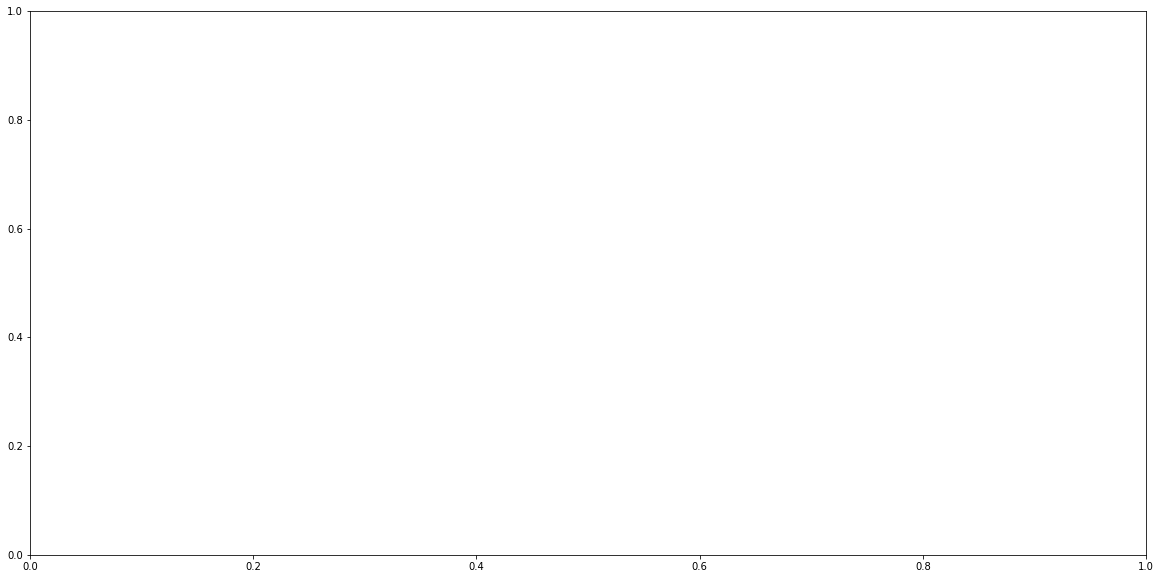

In [23]:
result,cluster, docs, docs_df, docs_per_topic = docvec(model1)

In [370]:

tf_idf, count = c_tf_idf(docs_per_topic.Doc.values, m=len(docs))

,Topic,Size
0,-1,37
2,1,29
17,16,25
1,0,21
10,9,14
19,18,13
7,6,11
8,7,10
11,10,10
13,12,10


In [131]:

top_n_words = extract_top_n_words_per_topic(tf_idf, count, docs_per_topic, n=20)


[('fiber', 0.032929810190857195),
 ('diffusion', 0.031988310329731),
 ('tensor', 0.023774861157086494),
 ('tractography', 0.02289201984294166),
 ('crossing', 0.020034806920963825),
 ('tracts', 0.017929453404837658),
 ('matter', 0.014394004309817222),
 ('white', 0.014394004309817222),
 ('dti', 0.013091680803717212),
 ('uncertainty', 0.013039795921343819)]

In [256]:
a =  ['valve', 'vessels', 'mitral', 'simulation', 'stress', 'blood vessels', 'mitral valve']
k = []
for i in a:
    for j in a:
        if  i!=j and i in j:
            k.append(i)

filtered = filter(lambda i: i not in k, a)
print(list(filtered))


['simulation', 'stress', 'blood vessels', 'mitral valve']


In [258]:
a =  ['valve', 'vessels', 'mitral', 'simulation', 'stress', 'blood vessels', 'mitral valve']
for i in range(len(a) - 1, -1, -1):
    for j in range(len(a) - 1, -1, -1):
            if  a[i]!=a[j] and a[i] in a[j]:
                del a[i]


['simulation', 'stress', 'blood vessels', 'mitral valve']